<a href="https://colab.research.google.com/github/Hyewon0920/simple-machine-learning-project/blob/main/chapter_8_%EC%9C%A0%EB%B0%A9%EC%95%94%EC%98%88%EC%B8%A1%EC%97%AC%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

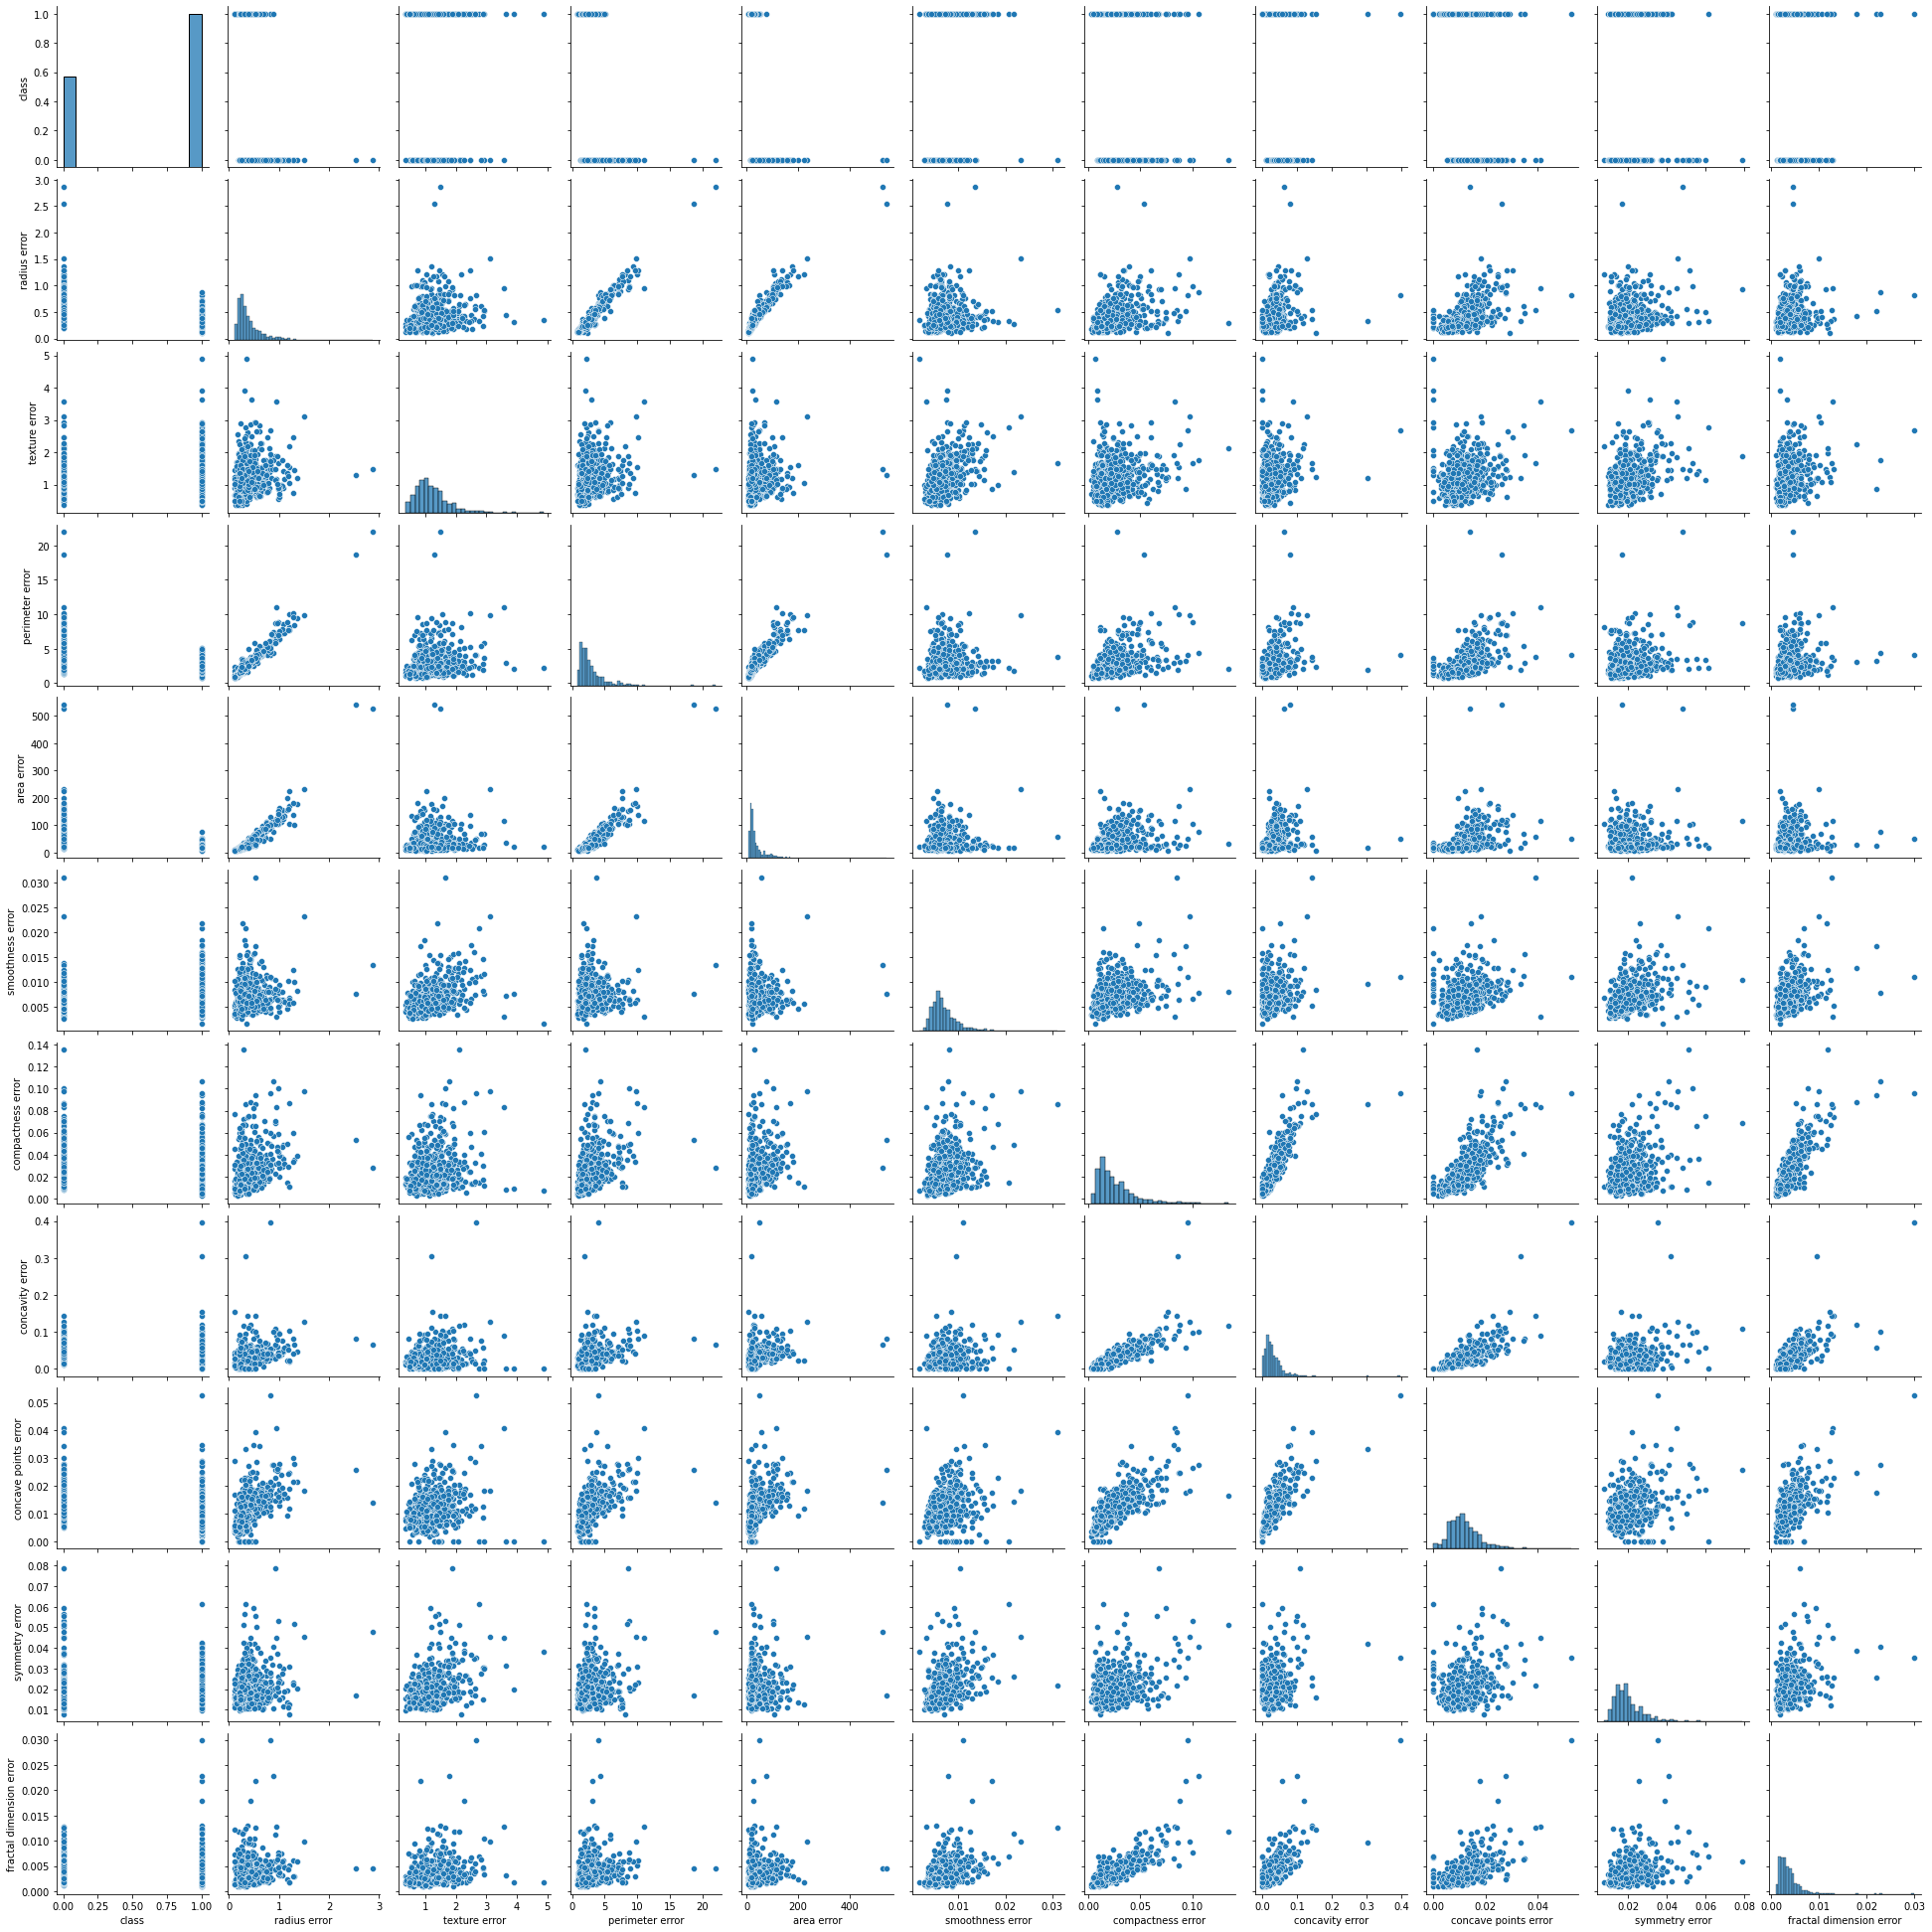

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df["class"] = cancer.target


sns.pairplot(df[["class"] + list(df.columns[10:20])])
plt.show()

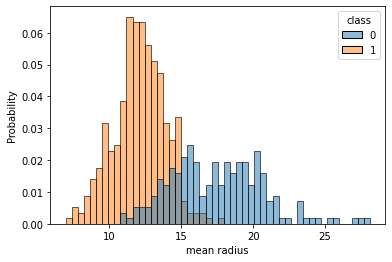

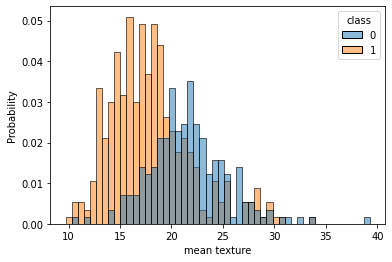

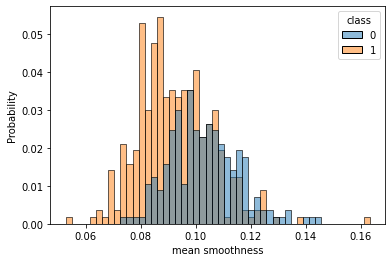

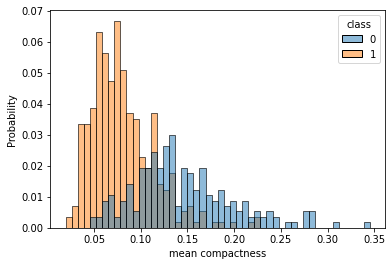

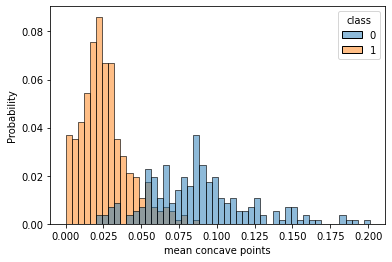

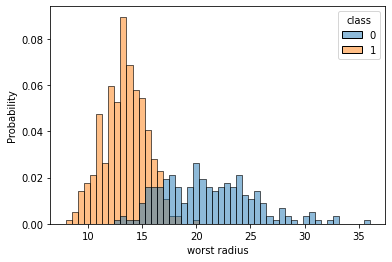

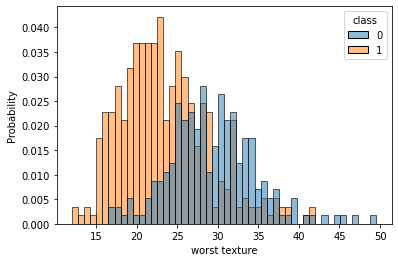

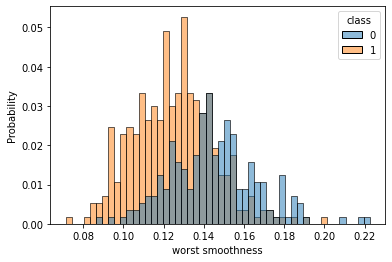

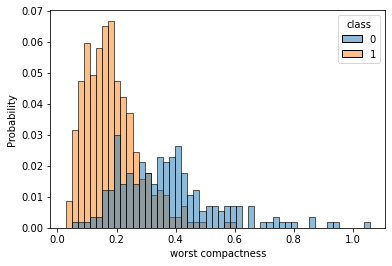

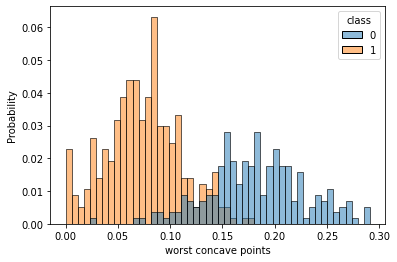

In [4]:
cols = ["mean radius", "mean texture", "mean smoothness", "mean compactness",
"mean concave points", "worst radius", "worst texture", "worst smoothness", "worst compactness", 
"worst concave points", "class"]

for c in cols[:-1] :
  sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
  plt.show()

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

data = torch.from_numpy(df[cols].values).float()

data.shape

x = data[:,:-1]
y = data[:, -1:]

print(x.shape, y.shape)


torch.Size([569, 10]) torch.Size([569, 1])


In [7]:
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [8]:
class MyModel(nn.Module) :
	
	def __init__(self, input_dim, output_dim) :
		self.input_dim = input_dim
		self.output_dim = output_dim

		super().__init__()
		self.linear = nn.Linear(input_dim, output_dim)
		self.act = nn.Sigmoid()

	def forward(self, x) :
		y = self.act(self.linear(x))
		"""
x는 (batch size, feature num(input_dim))으로 이루어져있고 
y는 (batch size, feature num(output_dim))으로 이루어짐
		"""
		return y
  
model = MyModel(input_dim = x.size(-1), output_dim = y.size(-1))

crit = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

for i in range(n_epochs) :
		y_hat = model(x)
		loss = crit(y_hat, y)

		optimizer.zero_grad()
		loss.backward()

		optimizer.step()

		if (i+1) % print_interval == 0 :
			print('Epoch %d : loss = %.4e' % (i+1, loss))

Epoch 10000 : loss = 2.7756e-01
Epoch 20000 : loss = 2.2873e-01
Epoch 30000 : loss = 1.9960e-01
Epoch 40000 : loss = 1.8061e-01
Epoch 50000 : loss = 1.6735e-01
Epoch 60000 : loss = 1.5759e-01
Epoch 70000 : loss = 1.5011e-01
Epoch 80000 : loss = 1.4418e-01
Epoch 90000 : loss = 1.3938e-01
Epoch 100000 : loss = 1.3539e-01
Epoch 110000 : loss = 1.3204e-01
Epoch 120000 : loss = 1.2916e-01
Epoch 130000 : loss = 1.2668e-01
Epoch 140000 : loss = 1.2450e-01
Epoch 150000 : loss = 1.2258e-01
Epoch 160000 : loss = 1.2087e-01
Epoch 170000 : loss = 1.1933e-01
Epoch 180000 : loss = 1.1795e-01
Epoch 190000 : loss = 1.1669e-01
Epoch 200000 : loss = 1.1554e-01
